In [19]:
#%matplotlib notebook

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [21]:
odi = pd.read_csv('odicricinfo.csv')
odi.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [22]:
odi_ = odi[(odi['Team 1'] == 'India') | (odi['Team 2'] == 'India')]
odi_.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
11,ODI # 12,England,India,England,4 wickets,Leeds,"Jul 13, 1974"
12,ODI # 13,England,India,England,6 wickets,The Oval,"Jul 15-16, 1974"
18,ODI # 19,England,India,England,202 runs,Lord's,"Jun 7, 1975"
23,ODI # 24,East Africa,India,India,10 wickets,Leeds,"Jun 11, 1975"
27,ODI # 28,India,New Zealand,New Zealand,4 wickets,Manchester,"Jun 14, 1975"


In [23]:
odi_=odi_[['Team 1','Team 2','Winner','Ground']]

In [24]:
odi_['I/O'] = odi_['Winner'].apply(lambda x: 1 if x == 'India' else 0)

In [25]:
def clean_names(City_name):
    if re.search('\(.*', City_name):
        pos = re.search('\(.*', City_name).start()
        return City_name[:pos-1]
    else:
        return City_name

In [26]:
odi_['Ground'] = odi_['Ground'].apply(clean_names)

In [27]:
indian_cities = ['Kolkata','Chennai','New Delhi','Mumbai','Kanpur','Bengaluru','Cuttack','Ahmedabad','Mohali','Visakhapatnam','Hyderabad','Indore','Nagpur','Pune','Rajkot','Ranchi','Dharamshala','Greater Noida','Guwahati','Thiruvananthapuram','Dehradun','Lucknow','Delhi']

In [28]:
indian_cities = set(indian_cities)

In [29]:
odi_['ig/og'] = odi_['Ground'].apply(lambda x: 1 if x in indian_cities else 0)


In [30]:
len(odi_[(odi_['ig/og']== 1) & (odi_['I/O'] == 1)])

152

In [31]:
igw = len(odi_[(odi_['ig/og']== 1) & (odi_['I/O'] == 1)])
igl = len(odi_[(odi_['ig/og']== 1) & (odi_['I/O'] == 0)])
ogw = len(odi_[(odi_['ig/og']== 0) & (odi_['I/O'] == 1)])
ogl = len(odi_[(odi_['ig/og']== 0) & (odi_['I/O'] == 0)])

In [32]:
final = pd.DataFrame([[igw,igl],[ogw,ogl]],index=['INDIA','OTHER'],columns=['W','L'])

In [33]:
final.reset_index(inplace=True)
final.columns = ['PLAYED IN', 'WIN','LOSS']
final

,PLAYED IN,WIN,LOSS
0,INDIA,152,105
1,OTHER,348,361


In [34]:
dic = {'win':[(igw/(igw+igl))*100,(ogw/(ogw+ogl))*100],'loss':[(igl/(igw+igl))*100,(ogl/(ogw+ogl))*100]}

In [35]:
labels = [str(round(dic['win'][0]))+'%',str(round(dic['win'][1]))+'%',str(round(dic['loss'][0]))+'%',str(round(dic['loss'][1]))+'%']

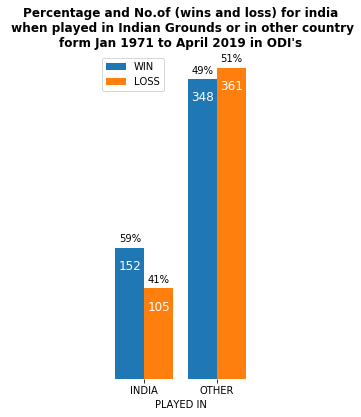

In [36]:
fig, ax = plt.subplots(figsize = (3,6))
barss = final.plot.bar(x='PLAYED IN', ax=ax, width = 0.8,align = 'center')
ax.axes.yaxis.set_visible(False)
plt.xticks(final.index.values, rotation = 0)
rects = ax.patches
plt.title('Percentage and No.of (wins and loss) for india\n when played in Indian Grounds or in other country\nform Jan 1971 to April 2019 in ODI\'s', fontweight = 'bold')

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    plt.gca().text(rect.get_x() + rect.get_width()/2, rect.get_height() -25, str(int(rect.get_height())), 
                 ha='center', color='w', fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()